In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy import stats
from sklearn.manifold import TSNE


In [2]:
data = pd.read_excel('BENG 212 PROJECT_with highest_only_numbers_log.xlsx',sheet_name= 'Genes_Samples', index_col = 0)
metadata=pd.read_excel('BENG 212 PROJECT_with highest_only_numbers_log.xlsx', sheet_name='metadata', index_col = 0)
#separate sheet created by grouping data from first excel sheet. 

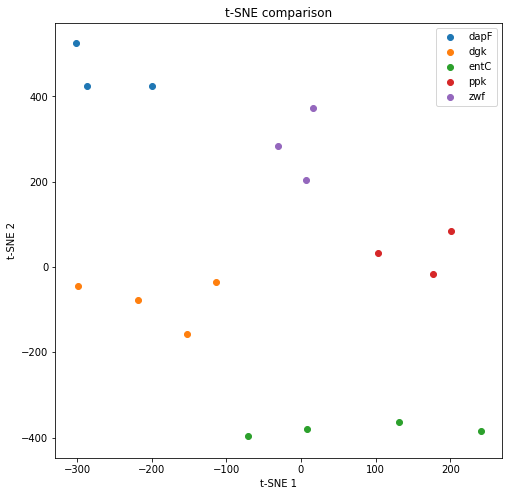

In [6]:
# Creating tsne plot using transposed data
data_tsne = TSNE(n_components=2, perplexity=5).fit_transform(data.T)

#necessary to convert to dataframe for plotting
df_data_tsne=pd.DataFrame(data_tsne, index=data.columns, columns=('1','2'))

#plotting the figure 
figure, ax = plt.subplots(figsize=(8,8))

#emptu list for appending the grouped datas
legend =[]

#loop using groups from metadata and positions from df_tsne_data in a single scatter plot. 
for name, group in metadata.groupby('Parent'):
    #1,2 are strings since they are manually put as index in the dataframe.
    ax.scatter(df_data_tsne.loc[group.index,'1'], df_data_tsne.loc[group.index,'2'])
    legend.append(name)
            
plt.legend(legend,loc='best')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title("t-SNE comparison")
plt.show()


Unlike PCA, axes in the low dimensional space in t-SNE don't have a particular meaning. t-SNE doesn't construct explicit mappings relating the high dimensional and low dimensional spaces. Rather, the relevant information is in the relative distances between low dimensional points. t-SNE captures structure in the sense that neighboring points in the input space will tend to be neighbors in the low dimensional space. So from this t-SNE plot, we can interpret that points clustering together have similar gene expression. Color coding according to parent gene mutations correlates with t-SNE's cluster groups. However, the relative distance between the clusters doesn't mean anything as they would mean in PCA. 
